# Analysis of Global Terrorism Database

Content
Geography: Worldwide

Time period: 1970-2016, except 1993 (2017 in progress, publication expected June 2018)

Unit of analysis: Attack

Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes

Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)

Definition of terrorism:

"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('data.csv', encoding = 'ISO-8859-1')
data.head()

C:\Users\Parmenides\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 175.5+ MB


# Getting rid of Nan values in data

In [3]:
data['latitude'].dropna(inplace = True)
data['country_txt'].dropna(inplace = True )

In [4]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.703500e+05,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,165744.000000,165744.000000,170346.000000,...,1.279000e+03,4.960000e+02,7.070000e+02,487.000000,9911.000000,9322.000000,170350.000000,170350.000000,170350.000000,170350.000000
mean,2.001776e+11,2001.709997,6.474365,15.466845,0.043634,132.526669,7.091441,23.399774,26.350909,1.454428,...,3.224502e+06,4.519918e+05,3.849663e+05,272.462012,4.624458,-28.717335,-4.583387,-4.510555,0.091083,-3.975128
std,1.314444e+09,13.144146,3.392364,8.817929,0.204279,112.848161,2.949206,18.844885,58.570068,1.009005,...,3.090625e+07,6.070186e+06,2.435027e+06,3130.068208,2.041008,58.737198,4.542694,4.630440,0.583166,4.691492
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.990053e+11,1990.000000,4.000000,8.000000,0.000000,75.000000,5.000000,11.263580,2.396199,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.007121e+11,2007.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.472680,43.130000,1.000000,...,1.420000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014023e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.744167,68.451297,1.000000,...,4.000000e+05,0.000000e+00,7.356800e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017013e+11,2016.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,1.000000e+09,1.320000e+08,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
data.drop(['eventid','extended','approxdate','resolution','region','addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related','country','kidhijcountry', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid',
       'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt','nreleased', 'provstate', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'ishostkid',
       'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert','specificity', 'vicinity','location', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple','success', 'suicide', 'attacktype1', 'attacktype2','attacktype3','attacktype2_txt', 'attacktype3_txt','targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname',
       'gname2', 'gsubname2', 'gname3', 'gsubname3','guncertain1',
       'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap',
       'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'motive', 'iday','imonth'],axis = 1, inplace = True)

In [7]:
data.head()

,iyear,country_txt,region_txt,city,latitude,longitude,attacktype1_txt
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination
1,1970,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping)
2,1970,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination
3,1970,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion
4,1970,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack


In [8]:
data['country_txt'].value_counts()

Iraq                              22130
Pakistan                          13634
Afghanistan                       11306
India                             10978
Colombia                           8163
Philippines                        6212
Peru                               6088
El Salvador                        5320
United Kingdom                     5098
Turkey                             4106
Thailand                           3668
Somalia                            3482
Nigeria                            3418
Spain                              3245
Yemen                              3109
Sri Lanka                          2981
United States                      2758
Algeria                            2729
France                             2642
Lebanon                            2454
Chile                              2351
Egypt                              2165
Russia                             2158
West Bank and Gaza Strip           2144
Israel                             2133


In [9]:
data['region_txt'].value_counts()

Middle East & North Africa     46511
South Asia                     41497
South America                  18762
Western Europe                 16307
Sub-Saharan Africa             15491
Southeast Asia                 11453
Central America & Caribbean    10340
Eastern Europe                  5031
North America                   3346
East Asia                        794
Central Asia                     554
Australasia & Oceania            264
Name: region_txt, dtype: int64

In [10]:
data['attacktype1_txt'].value_counts()

Bombing/Explosion                      83073
Armed Assault                          40223
Assassination                          18402
Hostage Taking (Kidnapping)            10233
Facility/Infrastructure Attack          9581
Unknown                                 6425
Unarmed Assault                          913
Hostage Taking (Barricade Incident)      902
Hijacking                                598
Name: attacktype1_txt, dtype: int64

In [11]:
data['attacktype1_txt'].replace(to_replace = 'Hostage Taking (Kidnapping)',value = 'Kidnapping', inplace = True)
data['attacktype1_txt'].replace(to_replace = 'Facility/Infrastructure Attack',value = 'Infrastructure Attack', inplace = True)
data['attacktype1_txt'].replace(to_replace = 'Hostage Taking (Barricade Incident)',value = 'Barricade Incident', inplace = True)
data['attacktype1_txt'].replace(to_replace = 'Bombing/Explosion',value = 'Bombing', inplace = True)

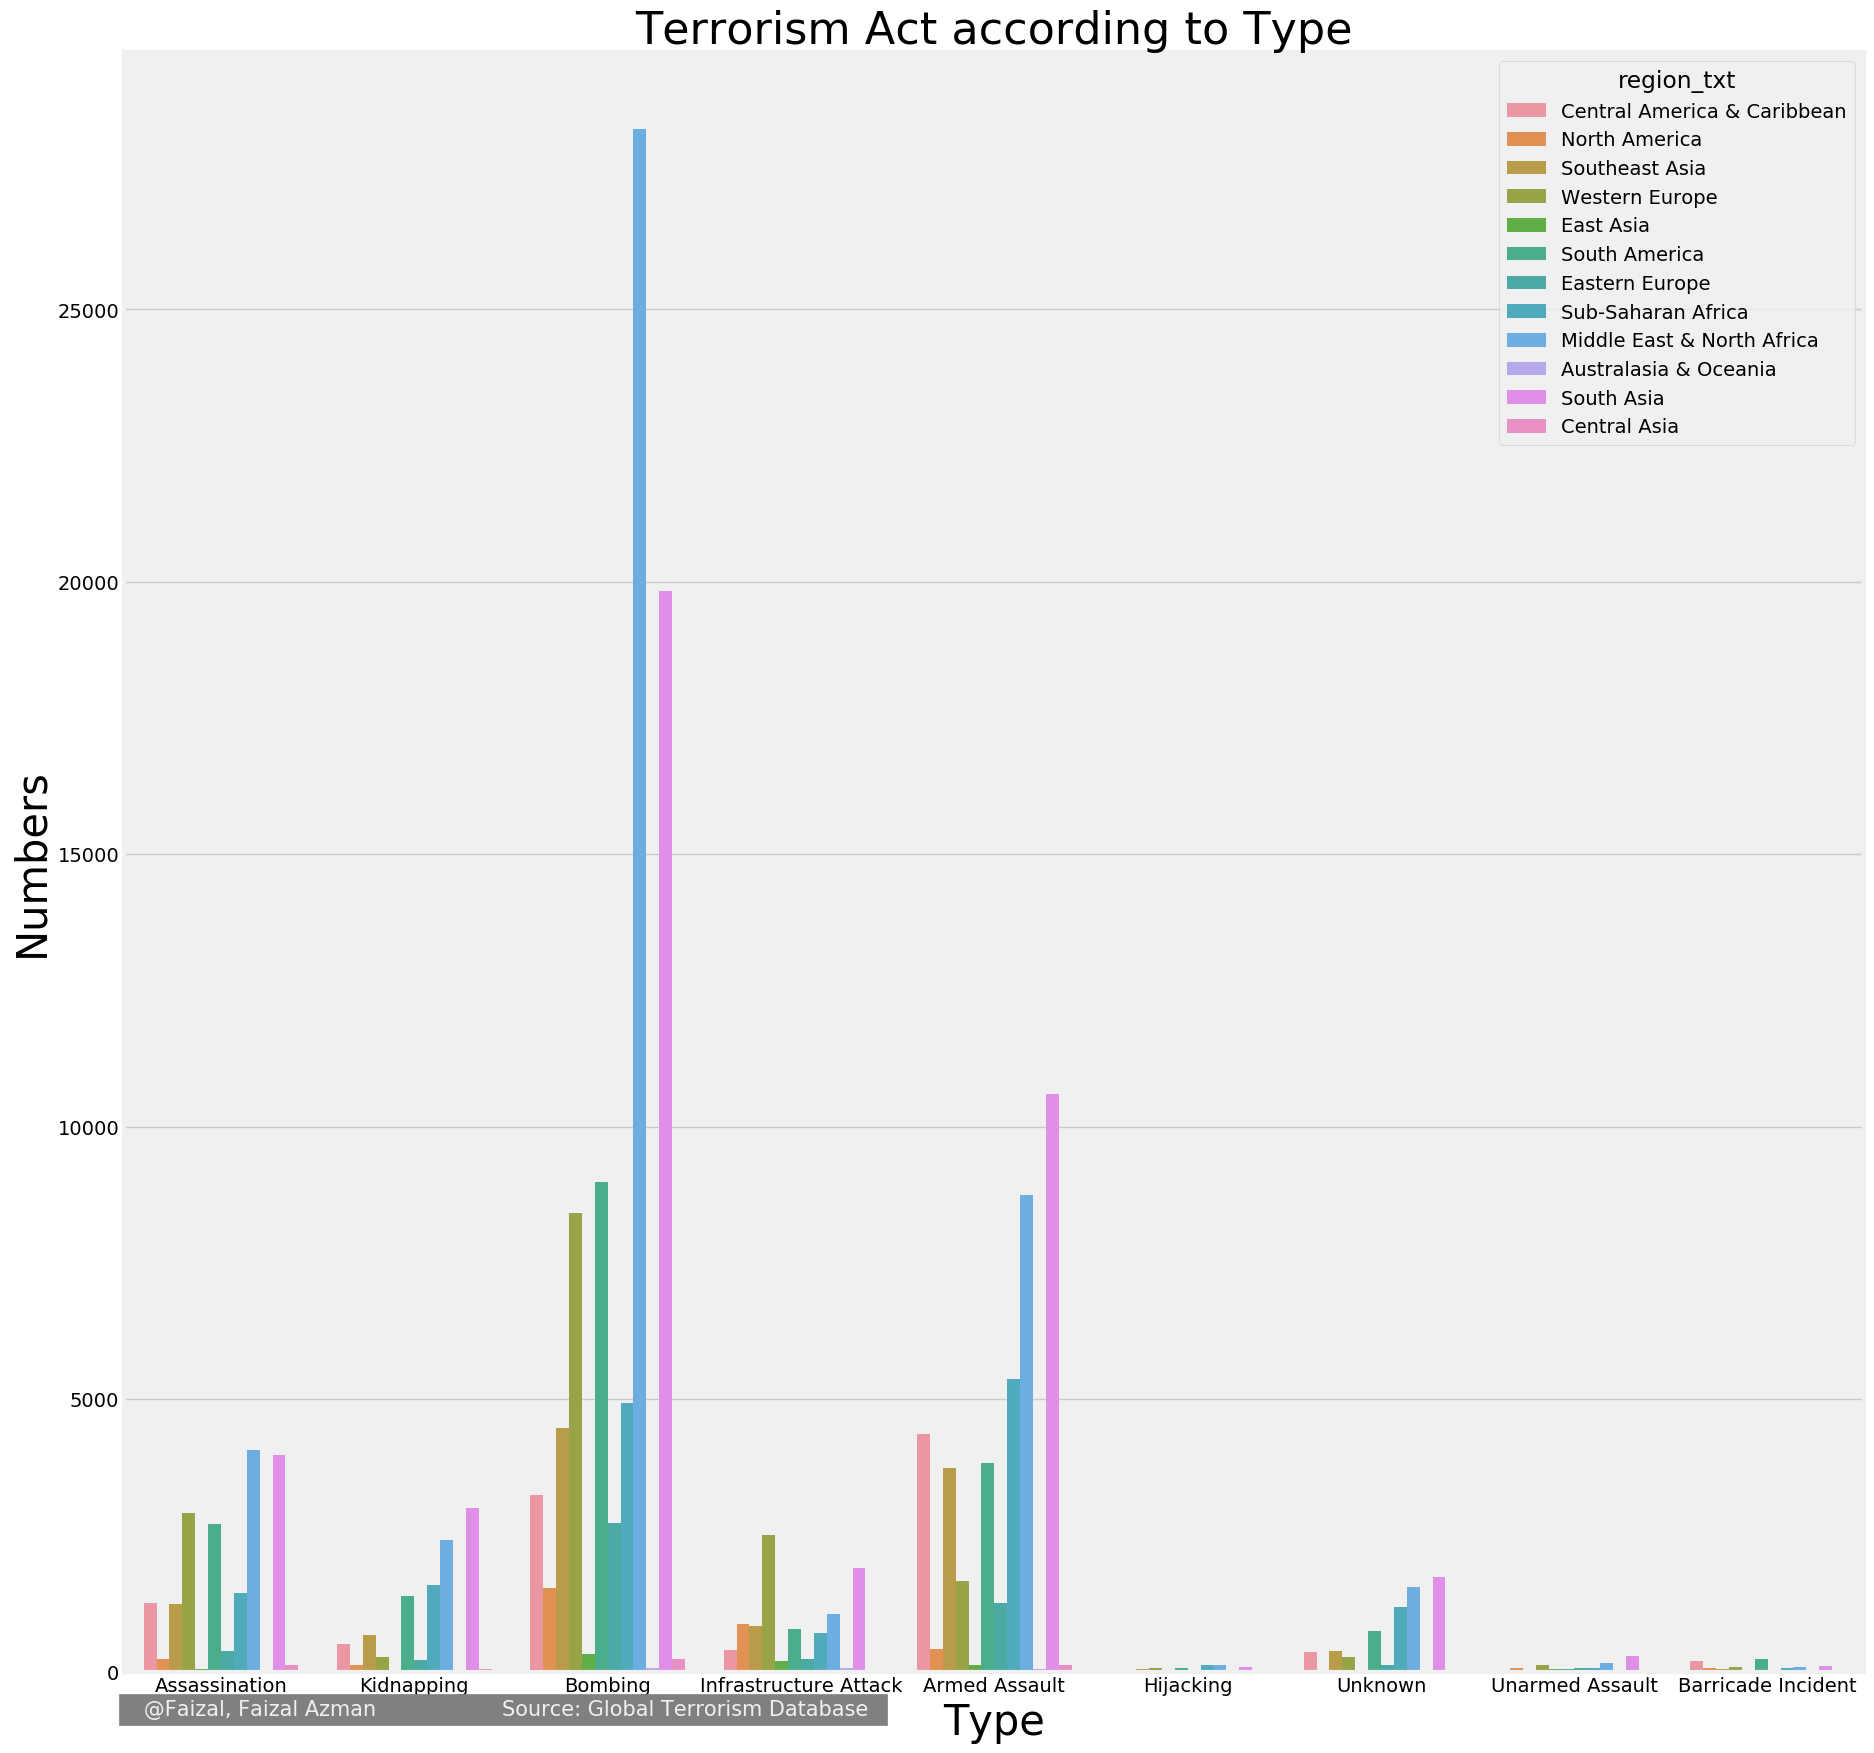

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(num=None,figsize=(20,20),dpi=100,facecolor='w',edgecolor='k')
sns.countplot(data['attacktype1_txt'], hue = data['region_txt'])
plt.title('Terrorism Act according to Type',fontsize=32)
plt.ylabel('Numbers',fontsize=30)
plt.xlabel('Type',fontsize=30)

#Signature Bar
plt.text(x=-0.5,y=-800,s = '   @Faizal, Faizal Azman                   Source: Global Terrorism Database  ',
    fontsize = 15, color = '#f0f0f0', backgroundcolor = 'grey')
#save the plot
plt.savefig('terrorismaccordingtype.png')

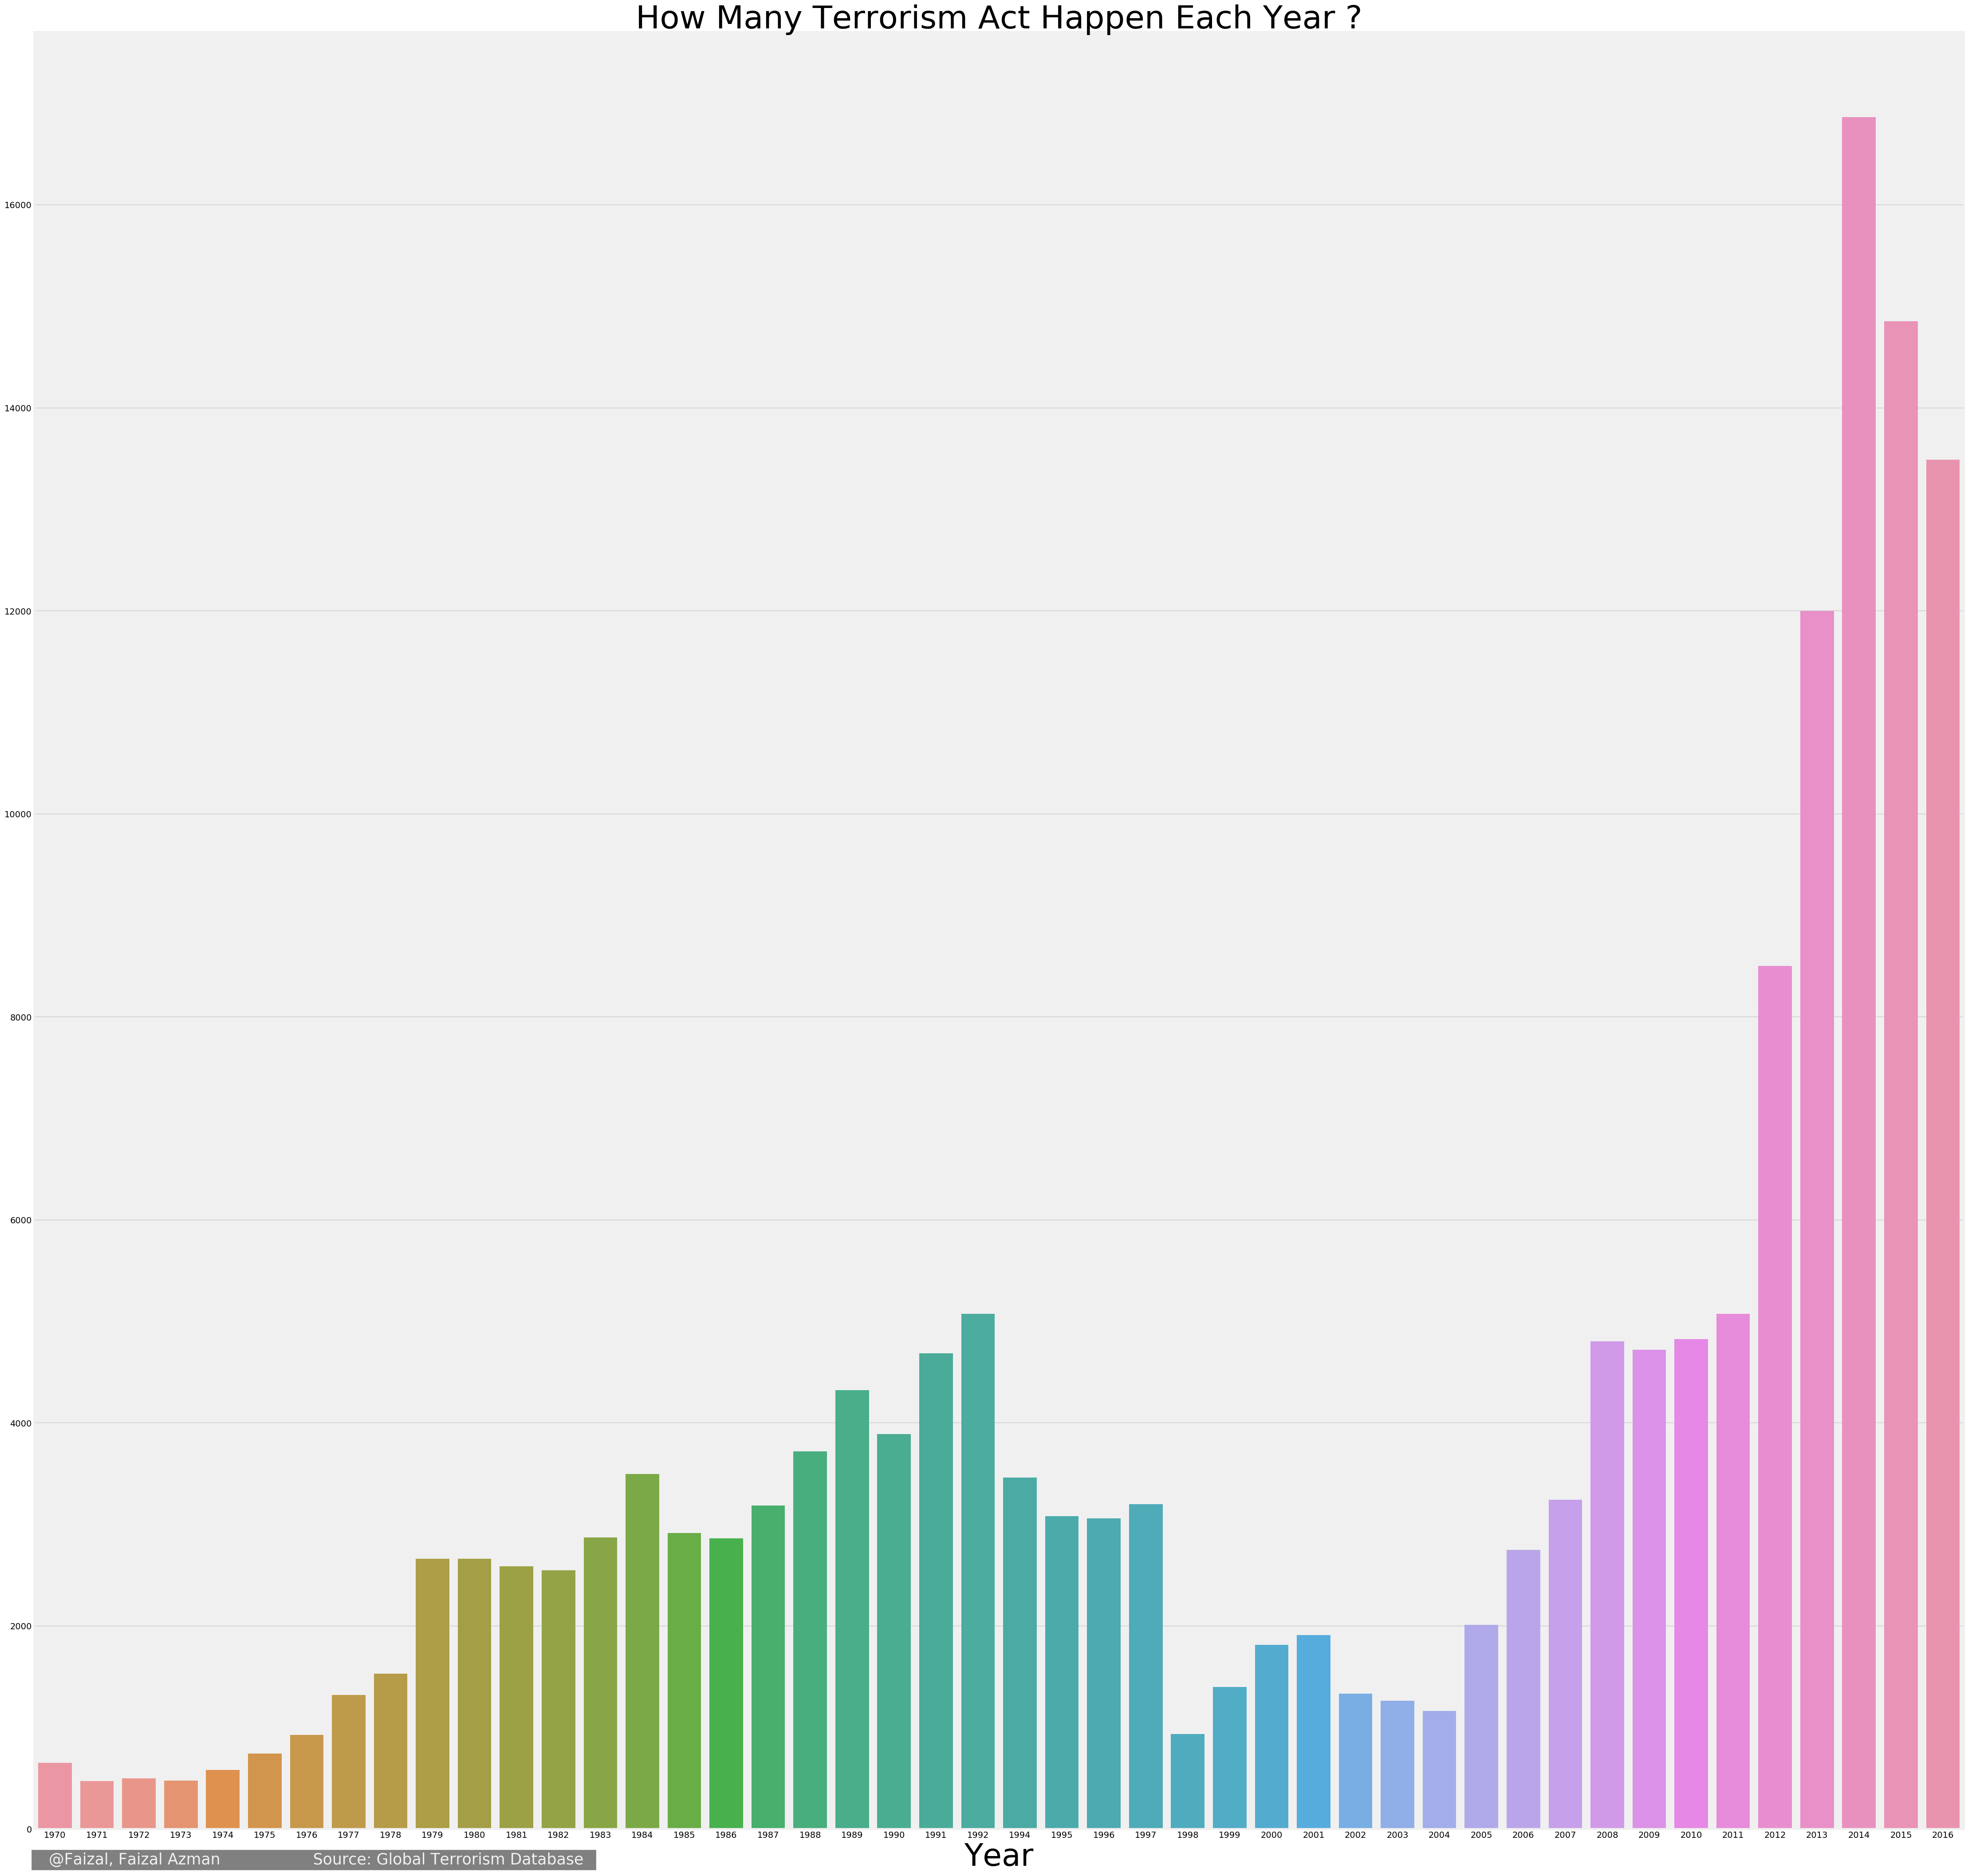

In [13]:
plt.figure(num=None,figsize=(50,50),dpi=100,facecolor='w',edgecolor='k')
sns.countplot(data['iyear'])
plt.title('How Many Terrorism Act Happen Each Year ?',fontsize=52)
plt.ylabel(' ',fontsize=50)
plt.xlabel('Year',fontsize=50)

#Signature Bar
plt.text(x=-0.5,y=-350,s = '   @Faizal, Faizal Azman                   Source: Global Terrorism Database  ',
    fontsize = 25, color = '#f0f0f0', backgroundcolor = 'grey')
#save the plot
plt.savefig('terrorismaccordingyear.png')

In [14]:
print (data['latitude'].min())
print (data['latitude'].max())
print (data['longitude'].min())
print (data['longitude'].max())

-53.154613
74.633553
-176.176447
179.366667


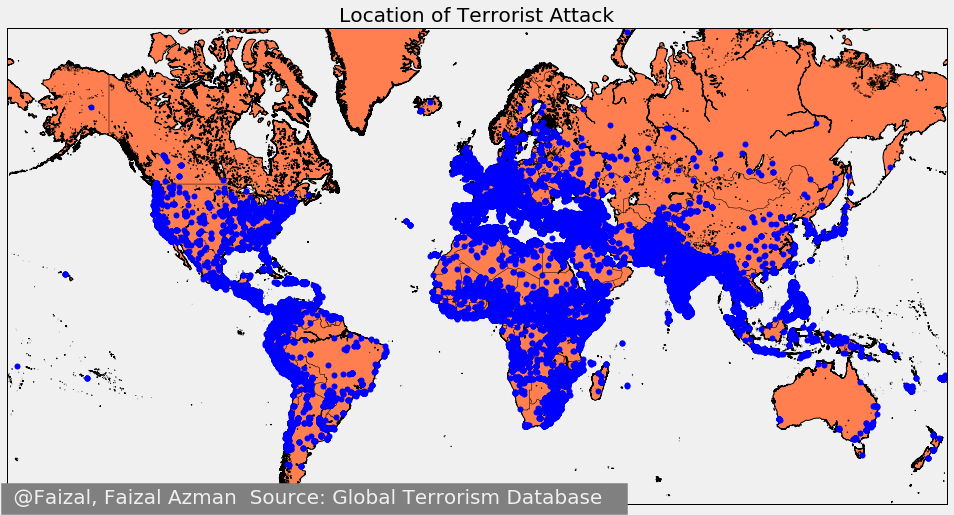

In [23]:
#Let's draw the map
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(15,15))
map1 = Basemap(projection='merc', lat_0 = 20, lon_0 = 40,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-180, llcrnrlat=-55,
    urcrnrlon=180, urcrnrlat=75)
 
map1.drawcoastlines()
map1.drawcountries()
map1.fillcontinents(color = 'coral')
map1.drawmapboundary()


#Let's plot the points in the map
lons = data['longitude'].values
lats = data['latitude'].values
x,y = map1(lons,lats)
    
map1.plot(x,y,'bo',markersize=5)
        
# The signature bar
plt.text(x=0,y=10.00 , s=' @Faizal, Faizal Azman  Source: Global Terrorism Database   ',
    color = '#f0f0f0', backgroundcolor = 'grey',fontsize=20)\

#The title
plt.title("Location of Terrorist Attack")
        
    

plt.savefig("terrorattack.png")
plt.show()

In [ ]:
data.to_csv('train.csv')